## Import Relevant Libraries

In [1]:
## Import the necessary libraries
import os
import sys

In [2]:
# Add the directory containing the `main.py` file to the system path
sys.path.append(os.pardir)

In [3]:
from main import CryptoCorrelation
from eda_toolkit import ensure_directory

## Path Directories

In [4]:
base_path = os.path.join(os.pardir)

# Go up one level from 'notebooks' to parent directory,
# then into the 'data' folder
data_path = os.path.join(os.pardir, "data")
data_output = os.path.join(os.pardir, "data_output")

# create image paths
image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Use the function to ensure'data' directory exists
ensure_directory(data_path)
ensure_directory(data_output)
ensure_directory(image_path_png)
ensure_directory(image_path_svg)

Directory exists: ..\data
Directory exists: ..\data_output
Directory exists: ..\images\png_images
Directory exists: ..\images\svg_images


## Using the `CryptoCorrelation` Class

The provided script demonstrates how to use the `CryptoCorrelation` class to fetch data, analyze correlations, and visualize the relationship between Litecoin active addresses and Bitcoin hashrate.


### 1. Import the `CryptoCorrelation` Class

In [5]:
from main import CryptoCorrelation

### 2. Initialize the CryptoCorrelation Object

In [6]:
## Initialize
crypto_correlation = CryptoCorrelation(api_key="your_coinmetrics_api_key")

### 3. Fetch Litecoin active addresses

- Retrieves daily Litecoin active addresses from the CoinMetrics API.

Parameters

- `start_date`: Start date for data fetching (e.g., `"2023-01-01"`).  
- `end_date`: End date for data fetching (e.g., `"2024-01-01"`).  
- `normalize`: If `True`, scales the data between `0` and `1`.  

Returns

- A DataFrame with dates and normalized active addresses.


In [7]:
## Fetch Litecoin active addresses
ltc_active_addresses = crypto_correlation.fetch_coin_active_addresses(
    start_date="2023-01-01",
    end_date="2024-01-01",
    normalize=True,
)

### 4. Fetch Bitcoin Hashrate

- Retrieves daily Bitcoin hashrate data from the CoinGecko API.

Parameters  

- normalize: If `True`, scales the data between `0` and `1`. 

Returns 

A DataFrame with dates and normalized hashrate.

In [8]:
## Fetch Bitcoin hashrate
btc_hashrate = crypto_correlation.fetch_bitcoin_hashrate(normalize=True)

### 5. Analyze Correlation and Generate Plots

- Aligns Litecoin active addresses with Bitcoin hashrate data, calculates the correlation, and generates visualizations.

Parameters

- `start_date` and `end_date`: Fetch data within this date range.  
- `normalize`: If True, normalizes the data.  
- `plot_type`: Type of plot to generate:  
    - `"time_series"`: Time-series plot.  
    - `"correlation"`: Scatter plot with regression line.  
    - `"both"`: Both time-series and correlation plots.  
- `save_plot`: If True, saves plots to specified directories.  
- `image_path_png`: Directory to save PNG plots.  
- `save_filename`: Base name for saved plots.  

Returns 

- `combined_df`: Combined DataFrame of Litecoin active addresses and Bitcoin hashrate.
- `correlation`: Pearson correlation coefficient between the two metrics.

Outputs

- Plots visualizing the relationship between active addresses and hashrate.

Correlation between Litecoin active addresses and Bitcoin hashrate: 0.6645


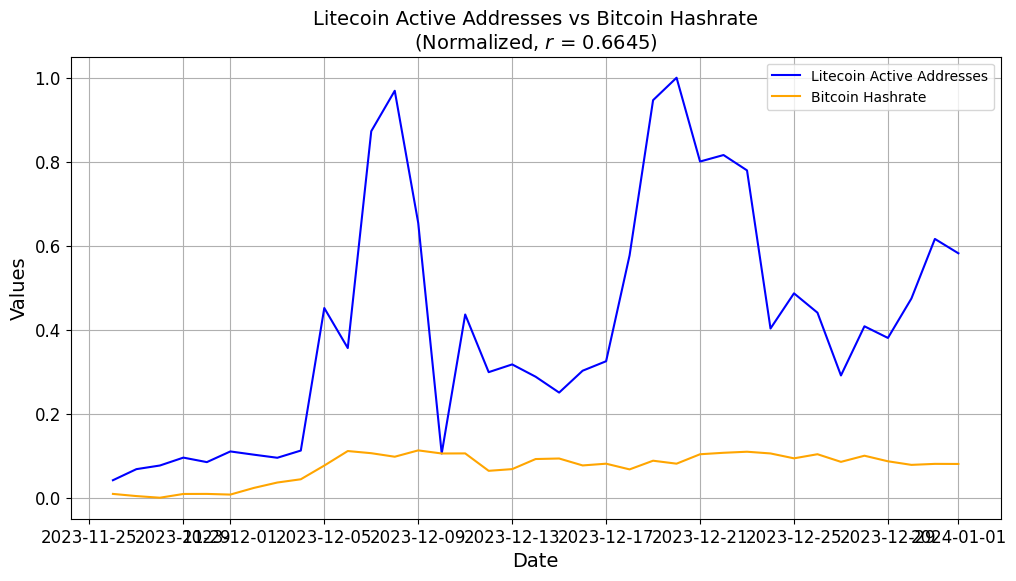

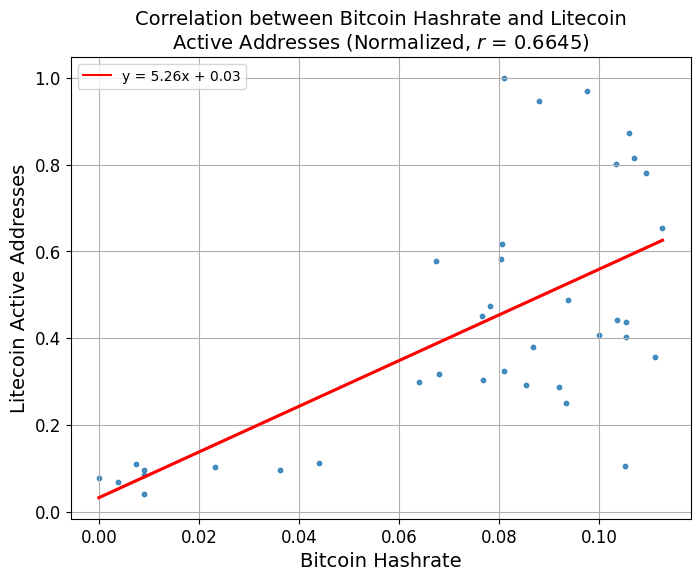

In [9]:
## Analyze correlation and generate plots
combined_df, correlation = crypto_correlation.connect_coin_users_to_btc_hashrate(
    start_date="2023-01-01",
    end_date="2024-01-01",
    normalize=True,
    plot_type="both",
    save_plot=True,
    image_path_png=image_path_png,
    save_filename="ltc_btc_correlation",
)

### 6. View the results


In [10]:
print(combined_df)
print(f"Correlation: {correlation:.4f}")
## Initialize the CryptoCorrelation class
crypto_correlation = CryptoCorrelation(api_key="your_coinmetrics_api_key")

            Active Addresses  Hashrate
Date                                  
2023-11-26          0.041657  0.009074
2023-11-27          0.068042  0.003918
2023-11-28          0.076692  0.000000
2023-11-29          0.095486  0.008951
2023-11-30          0.084764  0.009082
2023-12-01          0.110195  0.007485
2023-12-02          0.102486  0.023316
2023-12-03          0.095133  0.036180
2023-12-04          0.112281  0.043940
2023-12-05          0.451634  0.076595
2023-12-06          0.356360  0.111156
2023-12-07          0.872637  0.106005
2023-12-08          0.968947  0.097604
2023-12-09          0.654127  0.112716
2023-12-10          0.105337  0.105311
2023-12-11          0.436256  0.105514
2023-12-12          0.298972  0.064056
2023-12-13          0.317397  0.068107
2023-12-14          0.288070  0.092118
2023-12-15          0.250341  0.093380
2023-12-16          0.302387  0.076881
2023-12-17          0.324986  0.081017
2023-12-18          0.577100  0.067458
2023-12-19          0.946